# Interactive example
This is an example how one can incorporate adjust_text into an interactive matplotlib widget and automatically re-adjust texts after every resize of the figure canvas.

In [1]:
%matplotlib ipympl
import numpy as np
from adjustText import adjust_text
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


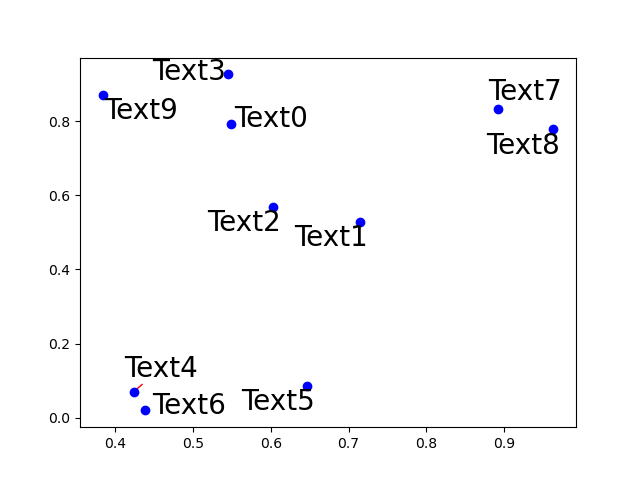

In [2]:
np.random.seed(0)
x, y = np.random.random((2,10))
fig, ax = plt.subplots()
ax.plot(x, y, 'bo')

texts, patches = None, None
def plot_text(event=None):
    # Make texts and patches global so that we can remove them later
    global texts, patches
    # Remove the texts and patches if they are not None
    if texts is not None:
        for text in texts:
            text.remove()
    if patches is not None:
        for patch in patches:
            patch.remove()
    # Create the texts 
    texts = [ax.text(x[i], y[i], 'Text%s' %i, ha='center', va='center', fontsize=20) for i in range(len(x))]
    # Use adjust_text to adjust the position of the texts to avoid overlap
    # Also connect the texts with the points using an arrow
    texts, patches = adjust_text(texts, arrowprops=dict(arrowstyle="-", color='r'), ax=ax, min_arrow_len=0, time_lim=0.1)
plot_text()

# Connect the event when canvas is resized to the function plot_text, which
# Includes the adjust_text function
# This will make the text move to avoid overlsp when the canvas is resized
cid = fig.canvas.mpl_connect('resize_event', plot_text)